# Import data

In [ ]:
# Import der Umsatz- und der Wetter-Daten
import pandas as pd


bakery = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/umsatzdaten_gekuerzt.csv"
bakery = pd.read_csv(bakery)
print(bakery)

weather = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/wetter.csv"
weather = pd.read_csv(weather)
print(weather)
kiwo = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/kiwo.csv"
kiwo = pd.read_csv(kiwo)
print(kiwo)

           id       Datum  Warengruppe      Umsatz
0     1307011  2013-07-01            1  148.828353
1     1307021  2013-07-02            1  159.793757
2     1307031  2013-07-03            1  111.885594
3     1307041  2013-07-04            1  168.864941
4     1307051  2013-07-05            1  171.280754
...       ...         ...          ...         ...
9329  1712216  2017-12-21            6   87.471228
9330  1712226  2017-12-22            6   71.911652
9331  1712236  2017-12-23            6   84.062223
9332  1712246  2017-12-24            6   60.981969
9333  1712276  2017-12-27            6   34.972644

[9334 rows x 4 columns]
           Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode
0     2012-01-01         8.0      9.8250                   14        58.0
1     2012-01-02         7.0      7.4375                   12         NaN
2     2012-01-03         8.0      5.5375                   18        63.0
3     2012-01-04         4.0      5.6875                   19      

In [2]:
# date format
from datetime import datetime

# Get the full name of the day (e.g., Monday)
dates = pd.Series(bakery["Datum"])

# Convert to datetime format
dates = pd.to_datetime(dates)

# Get the weekday names
bakery["Weekday"] = dates.dt.day_name()

print(bakery)

           id       Datum  Warengruppe      Umsatz    Weekday
0     1307011  2013-07-01            1  148.828353     Monday
1     1307021  2013-07-02            1  159.793757    Tuesday
2     1307031  2013-07-03            1  111.885594  Wednesday
3     1307041  2013-07-04            1  168.864941   Thursday
4     1307051  2013-07-05            1  171.280754     Friday
...       ...         ...          ...         ...        ...
9329  1712216  2017-12-21            6   87.471228   Thursday
9330  1712226  2017-12-22            6   71.911652     Friday
9331  1712236  2017-12-23            6   84.062223   Saturday
9332  1712246  2017-12-24            6   60.981969     Sunday
9333  1712276  2017-12-27            6   34.972644  Wednesday

[9334 rows x 5 columns]


# Data cleaning

In [ ]:
# data cleaning 
#Group by 'Weekday' and calculate the mean of 'Umsatz'
df = bakery.groupby('Weekday')['Umsatz'].agg(['mean', 'std', 'count'])
#df = pd.DataFrame(df)
df["order"] = [5,1,6,7,4,2,3]
df.sort_values(by="order", inplace = True)
print(df)


                 mean         std  count  order
Weekday                                        
Monday     193.688449  127.478584   1324      1
Tuesday    187.944440  126.548857   1345      2
Wednesday  187.477523  129.101393   1342      3
Thursday   193.232274  131.608242   1334      4
Friday     196.796023  127.453507   1311      5
Saturday   241.319882  166.971795   1336      6
Sunday     246.495651  178.536981   1342      7


# adding confidence intervals 

In [4]:
# Calculate a confidence interval.
from scipy.stats import norm
import numpy as np
#Confidence level
ci = 1-((1-0.95)/2)
print(ci)
#Find the z-score: Look up the cumulative probability of 1 − 0.025 = 0.975 in the z-table.
#From the z-table, the z-score corresponding to a cumulative probability of 0.975 is approximately 1.96.
ci = norm.ppf(ci)
print(ci)

# Standardfehler, Margin und CI berechnen
#df['se'] = df['std'] / np.sqrt(df['count'])
#df['margin'] = z * df['se']
#df['ci_lower'] = df['mean'] - df['margin']
#df['ci_upper'] = df['mean'] + df['margin']


df['ci_upper'] = df['mean'] + ci *( df['std']/np.sqrt(df['count']))
df['ci_lower'] = df['mean'] - ci *( df['std']/np.sqrt(df['count'])) 
print(df)

df['yerr'] = df['ci_upper'] - df['ci_lower']
print(df)

0.975
1.959963984540054
                 mean         std  count  order    ci_upper    ci_lower
Weekday                                                                
Monday     193.688449  127.478584   1324      1  200.555042  186.821855
Tuesday    187.944440  126.548857   1345      2  194.707530  181.181350
Wednesday  187.477523  129.101393   1342      3  194.384735  180.570312
Thursday   193.232274  131.608242   1334      4  200.294690  186.169859
Friday     196.796023  127.453507   1311      5  203.695220  189.896826
Saturday   241.319882  166.971795   1336      6  250.273282  232.366483
Sunday     246.495651  178.536981   1342      7  256.047776  236.943525
                 mean         std  count  order    ci_upper    ci_lower  \
Weekday                                                                   
Monday     193.688449  127.478584   1324      1  200.555042  186.821855   
Tuesday    187.944440  126.548857   1345      2  194.707530  181.181350   
Wednesday  187.477523  129.1

# Visualisations

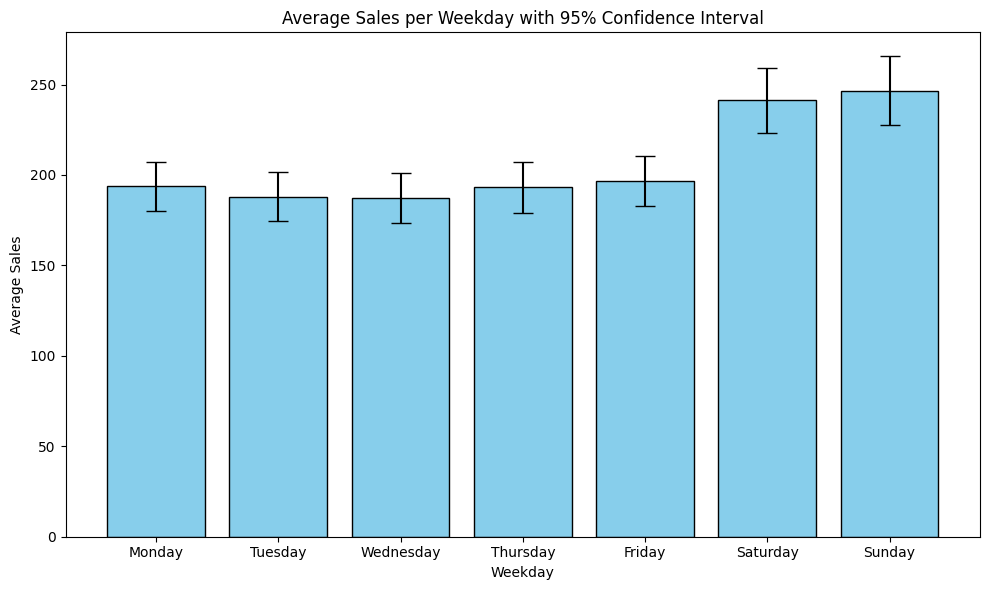

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Darstellung als bar-chart
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['mean'], yerr=df['yerr'], capsize=7, color='skyblue', edgecolor='black')
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.title('Average Sales per Weekday with 95% Confidence Interval')
plt.tight_layout()
plt.show()


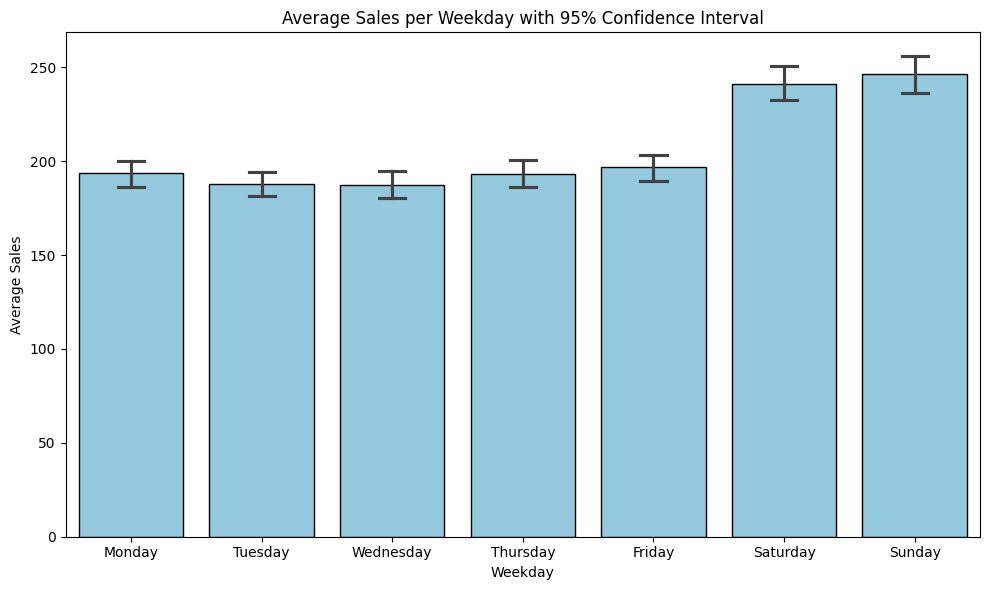

In [6]:
# Darstellung als bar-chart
plt.figure(figsize=(10, 6))
sns.barplot(data=bakery, x='Weekday', y='Umsatz',capsize=0.2,errorbar=("ci",95),
             color='skyblue', edgecolor='black') 
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.title('Average Sales per Weekday with 95% Confidence Interval')
plt.tight_layout()
plt.show()


In [ ]:
# merging data

In [ ]:
# merging data from different sources
print(bakery)
result = pd.merge(weather, kiwo, on='Datum', how='inner')
result = pd.merge(result, bakery, on='Datum', how='inner')
print(result)

           id       Datum  Warengruppe      Umsatz    Weekday
0     1307011  2013-07-01            1  148.828353     Monday
1     1307021  2013-07-02            1  159.793757    Tuesday
2     1307031  2013-07-03            1  111.885594  Wednesday
3     1307041  2013-07-04            1  168.864941   Thursday
4     1307051  2013-07-05            1  171.280754     Friday
...       ...         ...          ...         ...        ...
9329  1712216  2017-12-21            6   87.471228   Thursday
9330  1712226  2017-12-22            6   71.911652     Friday
9331  1712236  2017-12-23            6   84.062223   Saturday
9332  1712246  2017-12-24            6   60.981969     Sunday
9333  1712276  2017-12-27            6   34.972644  Wednesday

[9334 rows x 5 columns]
          Datum  Bewoelkung  Temperatur  Windgeschwindigkeit  Wettercode  \
0    2014-06-21         6.0     15.5125                   18        61.0   
1    2014-06-21         6.0     15.5125                   18        61.0   
2  